In [1]:
%run my_functions.ipynb

In [2]:
#sat_formula = random_kcnf(n_literals=3,n_conjuncts=5,k=3)
sat_formula = [[-1,-2,-3], [1,2,3], [-1,2,-3], [1,2,-3], [-1,-2,-3]]
#sat_formula

3 3
0
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


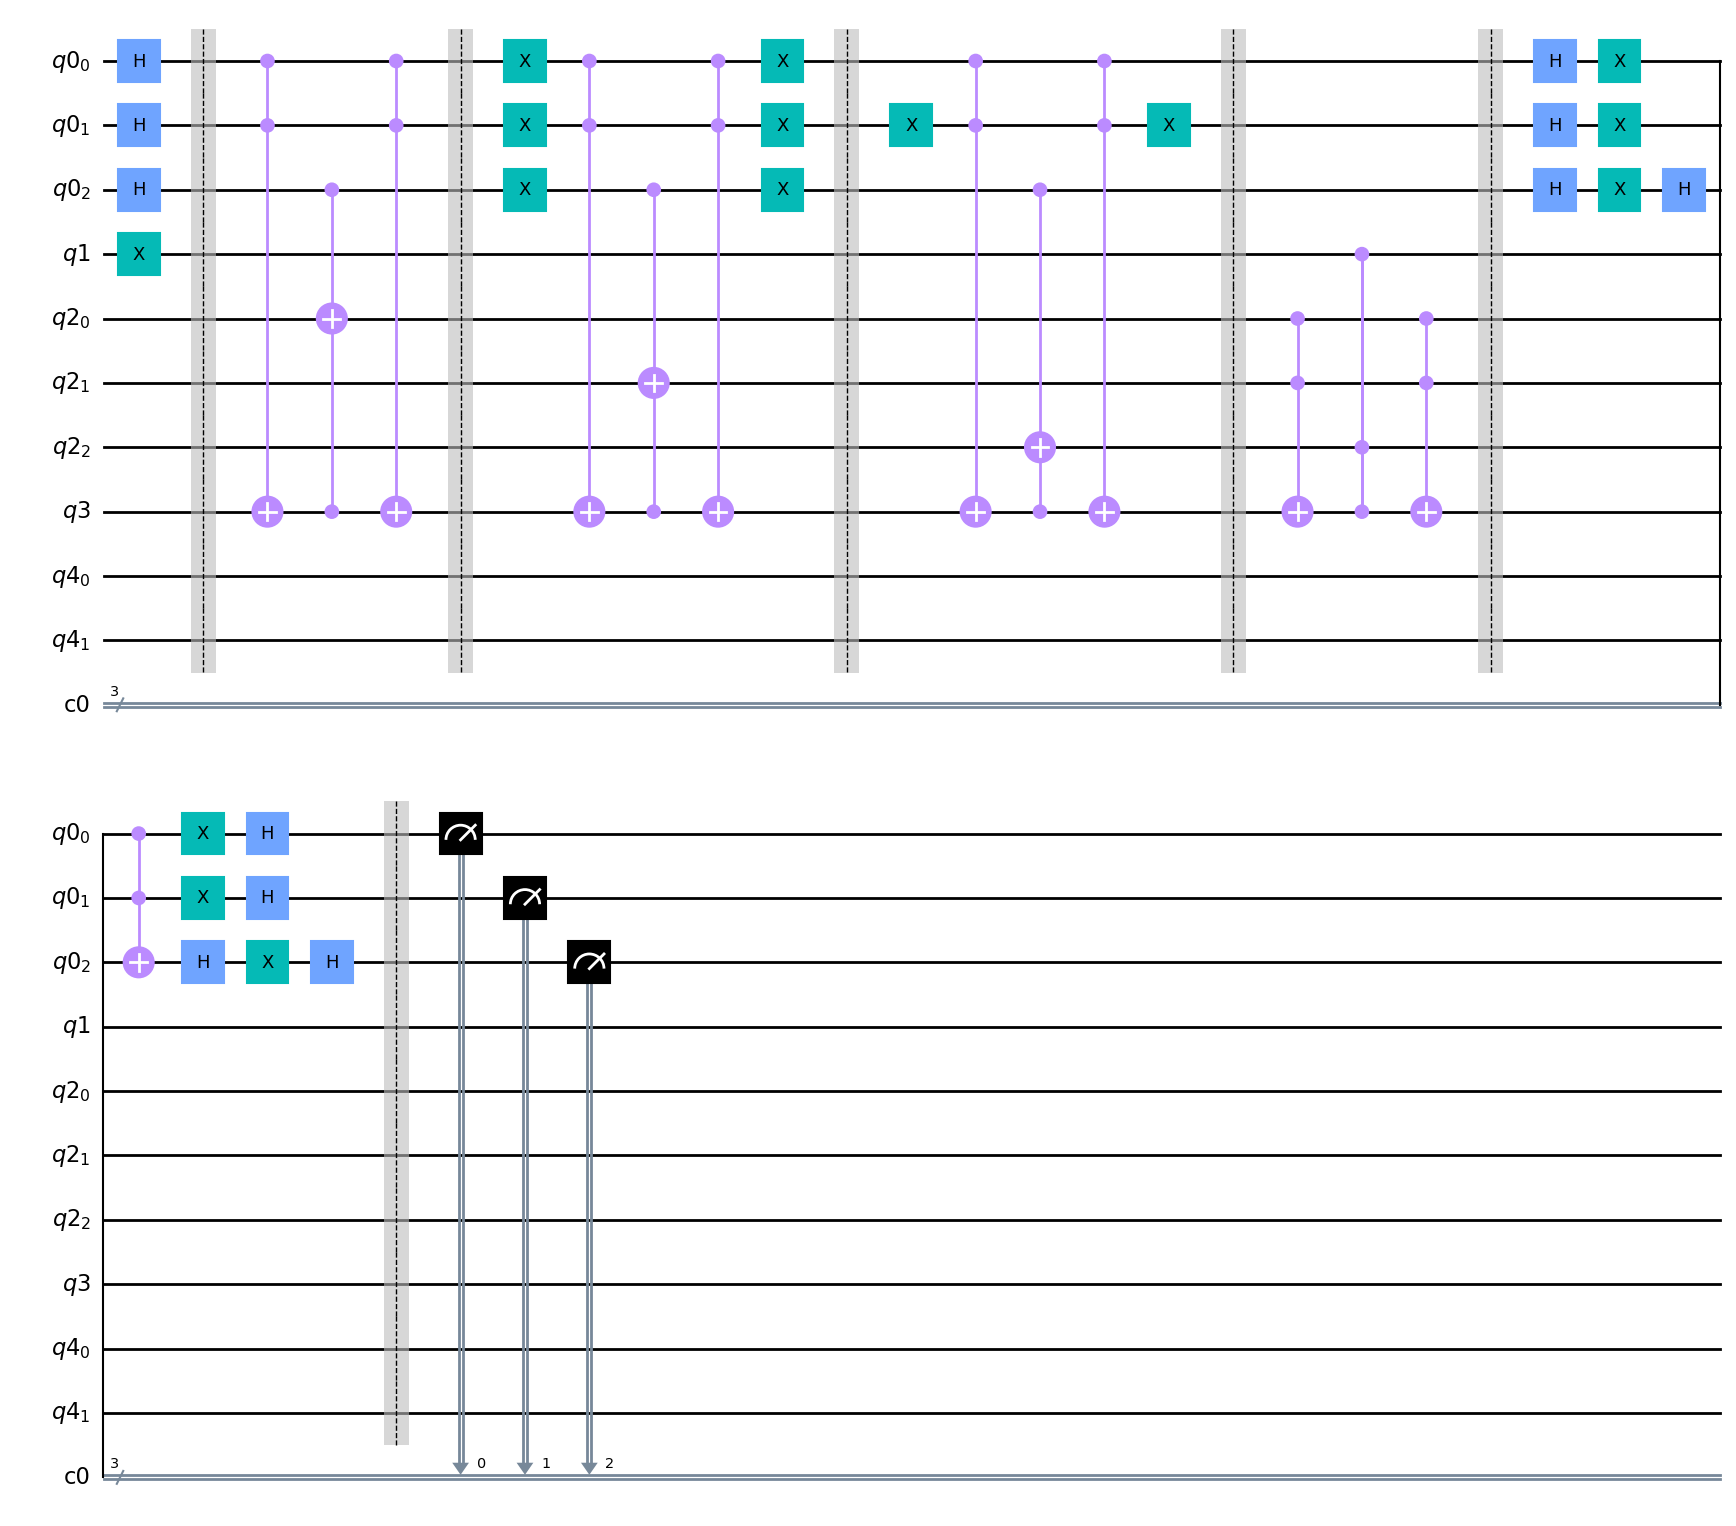

In [3]:
quant_part = [sat_formula[0]] + [sat_formula[1]] + [sat_formula[2]]
qc = hybrid_sat3(quant_part)
qc.draw('mpl')

In [4]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
soln = []
all_soln = []
for key,value in counts.items():
    all_soln.append(key)
    if value>sum(counts.values())/len(counts):
        soln.append(key)

quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max values above average from the dictionary:", quant_soln)

Measurement results: {'110': 31, '001': 28, '100': 29, '101': 295, '010': 33, '000': 305, '011': 23, '111': 280}
Max values above average from the dictionary: ['101', '000', '111']


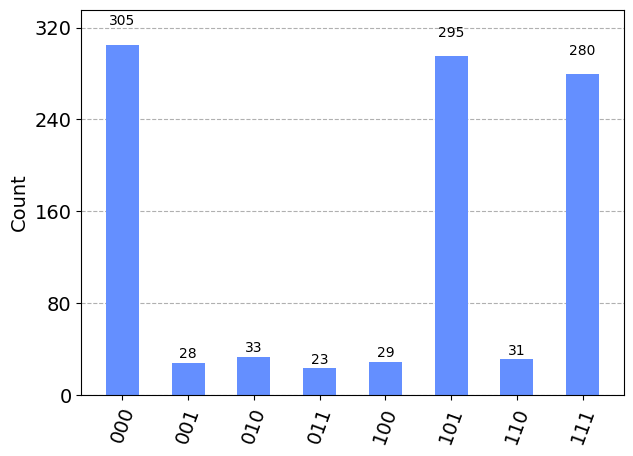

In [5]:
plot_histogram(counts)

In [6]:
quant_soln

['101', '000', '111']

In [7]:
# The above values corresponding to max counts are the false solutions. So, one work around is:
#Step 1: verify the above achieved solution using the classical_satchecker function to check if its the True or False solution
#Step 2: If True, continue to solve the rest of the problem
#Step 3: If False, then take the quantum solutions as [All outcomes - Outcomes corresponding to max values] and continue the problem.

In [8]:
#Verifying if the quantum solutions are TRUE solutions or FALSE solutions
brute_quant_soln = classical_sat_checker(quant_part,all_soln)

In [9]:
print(len(brute_quant_soln))
print(len(quant_soln))

5
3


In [10]:
if quant_soln == brute_quant_soln:
    print('quant_solutions match with brute force solutions')
else:
     print('quant_solutions Do NOT match with brute force solutions')   

if len(brute_quant_soln)<len(all_soln)/2 or len(brute_quant_soln)==len(all_soln)/2:
    print('Number of True Solutions are less than number of False solutions, thus quant_soln is expected to be same as brute force soln')
else:
    print('Number of True solutions are more, thus quant_soln is not the same as the brute force soln')

quant_solutions Do NOT match with brute force solutions
Number of True solutions are more, thus quant_soln is not the same as the brute force soln


In [11]:
new_quant_soln = classical_sat_checker(quant_part,quant_soln)
if new_quant_soln==['No solution exists']:
    new_quant_soln = [i for i in all_soln if i not in quant_soln]
new_quant_soln

['110', '001', '100', '010', '011']

In [12]:
brute_quant_soln

['110', '001', '100', '010', '011']

In [13]:
len(new_quant_soln)

5

In [14]:
if new_quant_soln == brute_quant_soln:
    print('Solution for quantum part agrees with brute force solutions')
else:
    print('Solution for quantum part DO NOT agree with brute force solutions')

Solution for quantum part agrees with brute force solutions


In [15]:
classical_part = [sat_formula[3]]+[sat_formula[4]]
sat_solution = classical_sat_checker(classical_part,new_quant_soln)
sat_solution

['110', '100', '010', '011']

In [16]:
brute_full_soln = classical_sat_checker(sat_formula,all_soln)
brute_full_soln

['110', '100', '010', '011']

In [17]:
if sat_solution == brute_full_soln:
    print('Solution for the sat problem agrees with brute force solutions')
else:
    print('Solutions do not agree with brute force solutions')

Solution for the sat problem agrees with brute force solutions


Find the complexity of the above algorithm. Check if its equivalent to classical sat solver? (I Assume NOT). Coz, I am using classical_sat_checker to check the solutions of quantum part
and also later for the classical part.

If one knows that the solutions for the given sat problem is a single or very few solutions possible in the search space, then one can be sure that the quantum part solutions are TRUE
solutions and thus can skip the step of verifying them by using classical_sat_checker. This case is thus automatically better than implementing the full classical solver.